# Reanalysis of Fukumoto et al. 2021
#### Akira Endo
## Background
A paper recently published in *Nature Medicine*, [Fukumoto et al., 2020](https://doi.org/10.1038/s41591-021-01571-8), tried to assess the government-led school closure policy during the early phase of the COVID-19 pandemic in 2020 in Japan. They compared the reported incidence rates between municipalities that had and had not implemented school closure in selected periods from March–May 2020, where they rigorously matched potential confounders, and claimed that they found no causal effect of school closure on the incidence rates of COVID-19. School closure as a means to control outbreaks has been studied mostly for influenza prior to the emergence of COVID-19, which generally suggested low-to-moderate effects, but the evidence on other respiratory infections including coronavirus diseases has been limited (Viner et al., 2020). Sometimes decisions for preemptive measures need to be made in the lack of sufficient evidence in the earliest phase of the pandemic; nonetheless, such decisions should undergo retrospective policy assessment to provide insights and refinement for future pandemic responses.

One of the largest challenges in this type of analysis of the early COVID-19 epidemic in Japan is the limited statistical power due to low case counts. During the first wave of the epidemic from February to June 2020 that overlapped with Fukumoto et al.'s study period, Japan never observed more than 1,000 COVID-19 cases per day. As a result, out of the total 79,989 municipality-level daily counts from the 847 municipalities included in Fukumoto et al., 99.9% were less than 10 cases per day (original study, Figure S2). Moreover, matching technique used to minimise possible confounding has a known side effect of limiting statistical power, especially when there is little overlap in the feature variables between the treatment and control groups.

Unfortunately, Fukumoto et al. is not exempt from this issue and appears to suffer insufficient statistical power. The study title says "No causal effect", which is a rather strong statement given the substantial uncertainty in their estimates. As the saying goes, "absence of evidence is not evidence of absence"—when the uncertainty range covers practically meaningful values, it should not be prematurely concluded that there is "no effect" just because the effect estimates is statistically insignificant. Here we highlight limitations of the analysis and discuss possible factors that may have rendered the study underpowered.

## Relative ATC and ATT estimates
The original study measures the effect of school closure as the absolute difference in incidence rates between treatment (i.e. with school closure) and control municipalities. However, the theoretical ground is unclear for assuming that school closure would cause additive changes to the incidence rate per capita. Presenting the effects in the relative scale of the baseline would be more intuitive for assessment of practicallity and fit to the purpose of the original study. It should also be noted that since incidence rates in the treatment group can only take non-negative values, the absolute mitigating effect of school can only be as high as the average incidence rate in the control group. 

To improve the interpretability of the results and discuss practical (not statistical) significance, we rescaled the reported average treatment effects (average treatment effect on the control: ATC and average treatment effect on the treatment: ATT) and their confidence intervals relative to the average outcome (incidence rate per capita) in the control group (Figure 1). The confidence intervals of the relative ATC and ATT cover most of the regions from 100% reduction to 100% elevation, suggesting the underpowered nature of the original study. Not only an effect of 50% relative reduction (i.e. -50% relative effect) in incidence rates, which most experts would agree is of practical significance, even complete reduction (relative effect of -100%) was within the confidence intervals over the substantial part of the period of interest.

Part of the limitation to the statistical power may be due to the use of matching. Since a subset of samples are either excluded or duplicated due to matching with replacement used in the analysis, the effective sample size (ESS) of the resulting matched samples became smaller than the number of unique municipalities in the matched samples, let alone that in the original dataset (Table 1). Because incidence of infectious diseases typically exhibits high dispersion due to its self-exciting nature (i.e. an increase in the number of cases induces a further increase via transmission), the required sample size to find a statistical difference can be larger than typical settings with independent and identically distributed samples.

In [1]:
## setup
# load packages
libnames=(c("repr","data.table","WeightIt","MatchIt","cobalt","matrixStats","survey","glmnet","glmnetUtils","CBPS","zoo","tidyverse"))
libs=sapply(libnames,function(x){suppressPackageStartupMessages(library(x,warn.conflicts=F,character.only=T))})
# run original source to reproduce Fig 1
source("Fukumoto2021/matching.R",chdir=T)
# run original source to reproduce Fig 5
source("Fukumoto2021/att.R",chdir=T)
# load plotting function
source("src/relATplot.R",chdir=T)

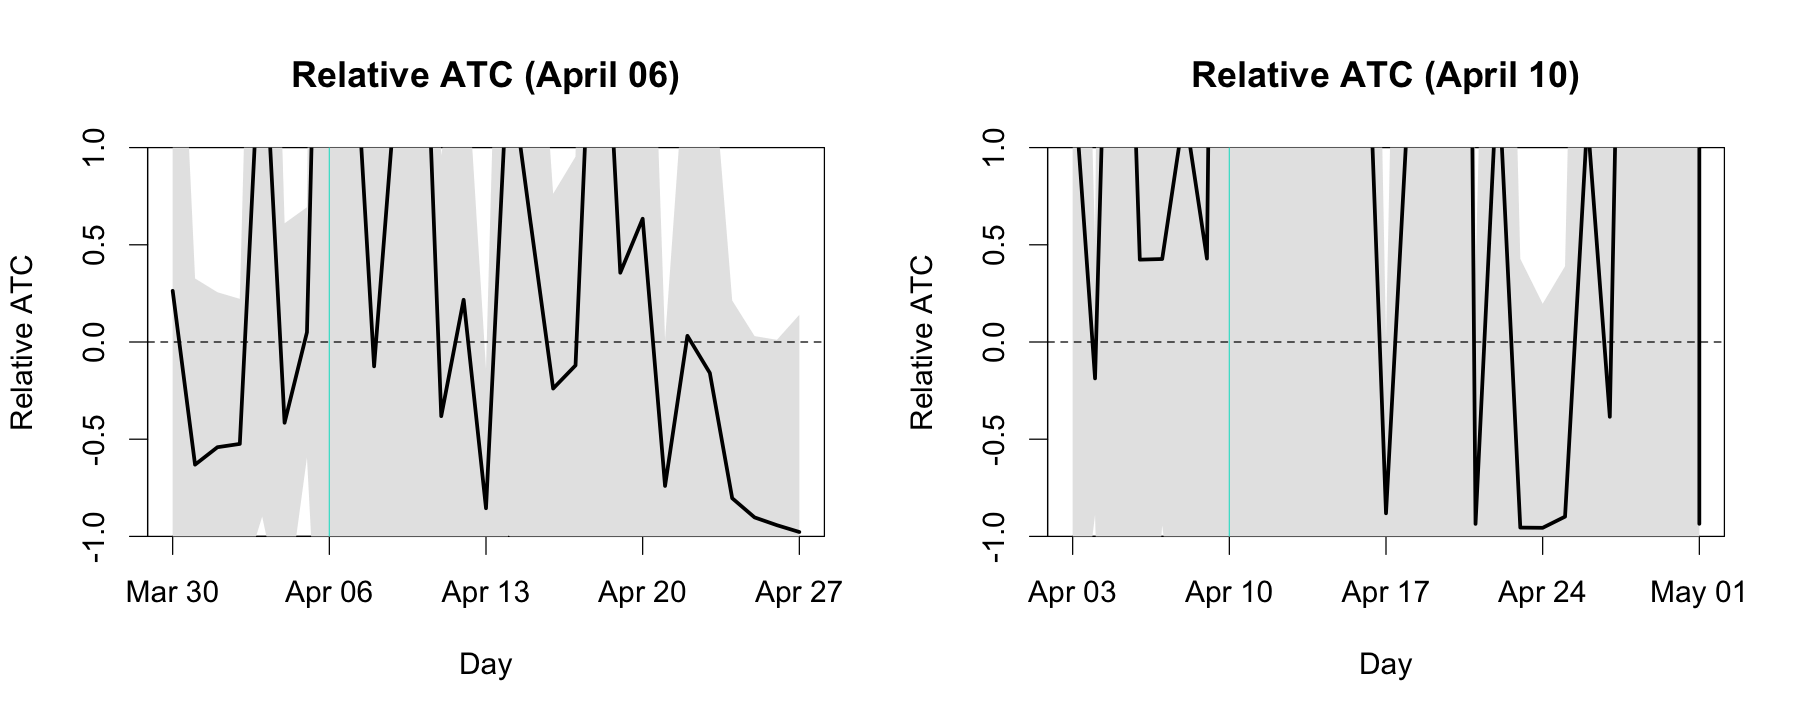

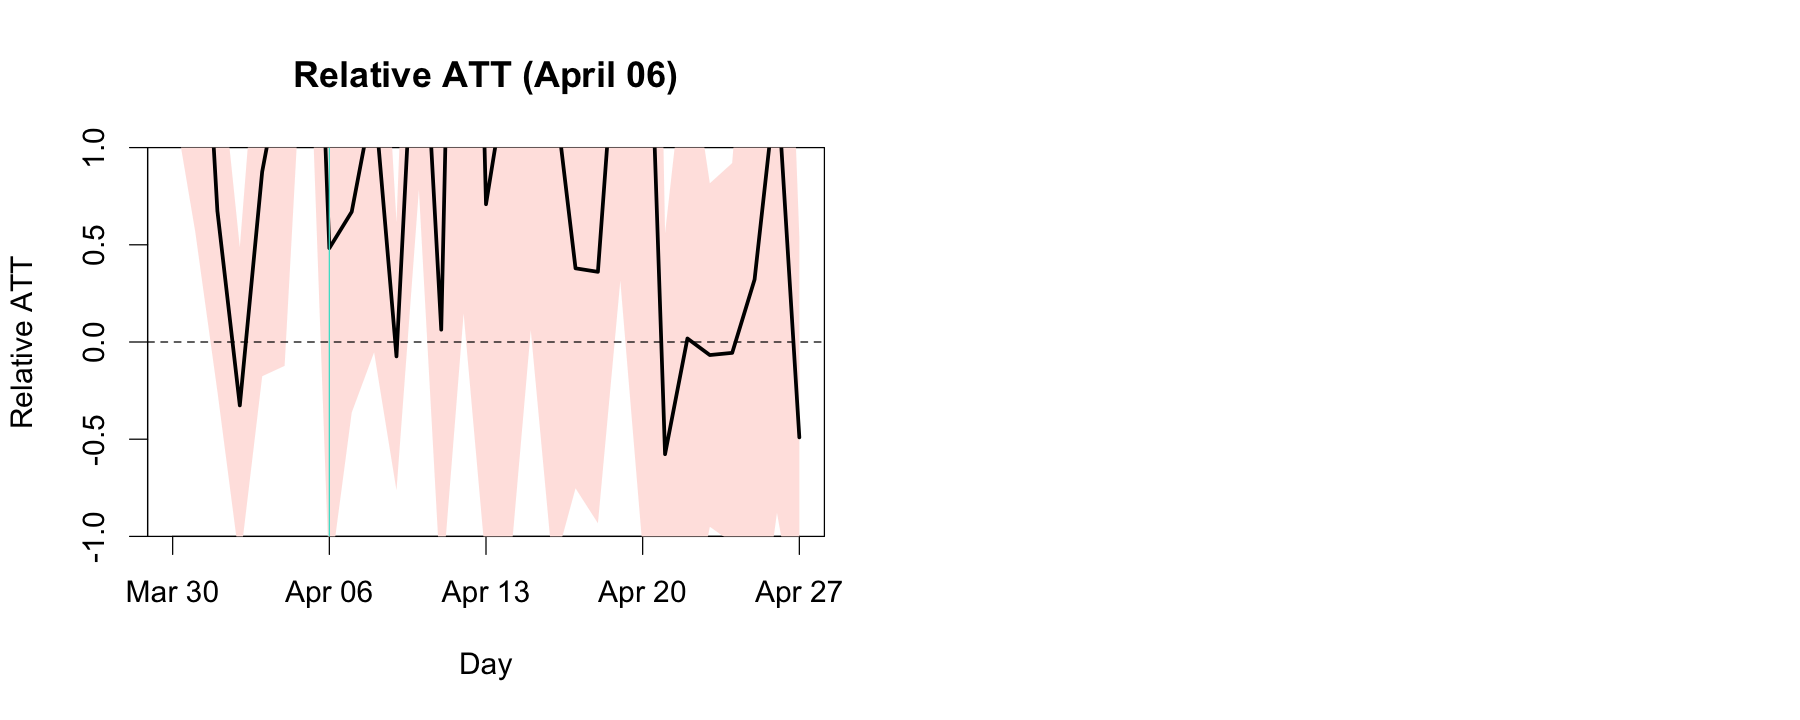

In [2]:
# Relative ATC
options(repr.plot.width=15,repr.plot.height=6)
par(mfrow=c(1,2),cex=1.5)
figlabels=c("1_e","1_f")
ATCApr6=relATplot(figlabels, "ATC")
figlabels=c("1_g","1_h")
ATCApr10=relATplot(figlabels, "ATC")
# Relative ATT
figlabels=c("5_a","5_b")
ATTApr6=relATplot(figlabels, "ATT",shadecolor="mistyrose1")

Figure 1. Relative ATC and ATT. The turquoise vertical lines represent the date of treatment (school closure). The black lines and shaded areas represent the mean effect and 95% confidence intervals, respectively.

In [3]:
esstables=lapply(list(ATCApr6=ATCApr6,ATCApr10=ATCApr10,ATTApr6=ATTApr6),function(x){x$matchingsummary$nn%>%round(.,1)})
esstables

,Control,Treated
All (ESS),483,256.0
All,483,256.0
Matched (ESS),483,37.5
Matched,483,99.0
Unmatched,0,157.0
Discarded,0,0.0
,Control,Treated
All (ESS),307,491.0
All,307,491.0
Matched (ESS),307,53.5


Table 1. Effective sample size of matched samples 

## Statistical power demonstration with assumed causal mitigating effect of 50%/80%
To further examine the statistical power of this study setting, we artificially modified the dataset such that school closure has exactly 50% or 80% mitigating effect on the incidence rate per capita. On the treatment reference date (April 6) and onward, the expected incidence rate of each municipality in the treatment group was assumed to be 50%/20% that of the matched control municipality.

To roughly simulate estimation and sampling errors in a convenience approach, we resampled case counts in the matched treatment and control municipalities from Poisson distributions. Let $C_i$ be the outcome variable of a control municipality $i$ with a population size $n_i$. We used the observed values $\hat C_i$ as the baseline mean incidence rate per capita for resampling $E(C_i)$ and constructed the mean for the treatment municipality matched to $i$ (with a population size $m_i$) as $E(T_i)=(1-\epsilon)E(C_i)$, where $\epsilon = 0.5, 0.8$ represents the relative reduction in the outcome variable. We then resampled the case counts in these matched municipalities from Poisson distributions and divided them by the corresponding population size $(n_i, m_i)$ and computed the estimates and confidence intervals for ATT and ATC from those resampled outcome values.
$$
C_i\sim\mathcal{Pois}(\hat C_i n_i)/n_i \\
T_i\sim\mathcal{Pois}\left((1-\epsilon)\hat C_i m_i\right)/m_i 
$$
The results suggest that, even with as much as 50%/80% mitigating effect, the approach in the original study may not have been able to find statistical significance. The absolute ATT for the 50% mitigating effect (Figure 2, top middle panel) appears similar to what were referred to as "no effect" in the original study. ATT for the 80% mitigating effect shows a weak trend towards mitigation, yet is statistically insignificant (Figure 2, bottom middle panel). Similarly, the estimates for ATC showed either statistically insignificant or barely significant results (Figure S1), suggesting the study was underpowered to find even moderate to high mitigating effect, if any.

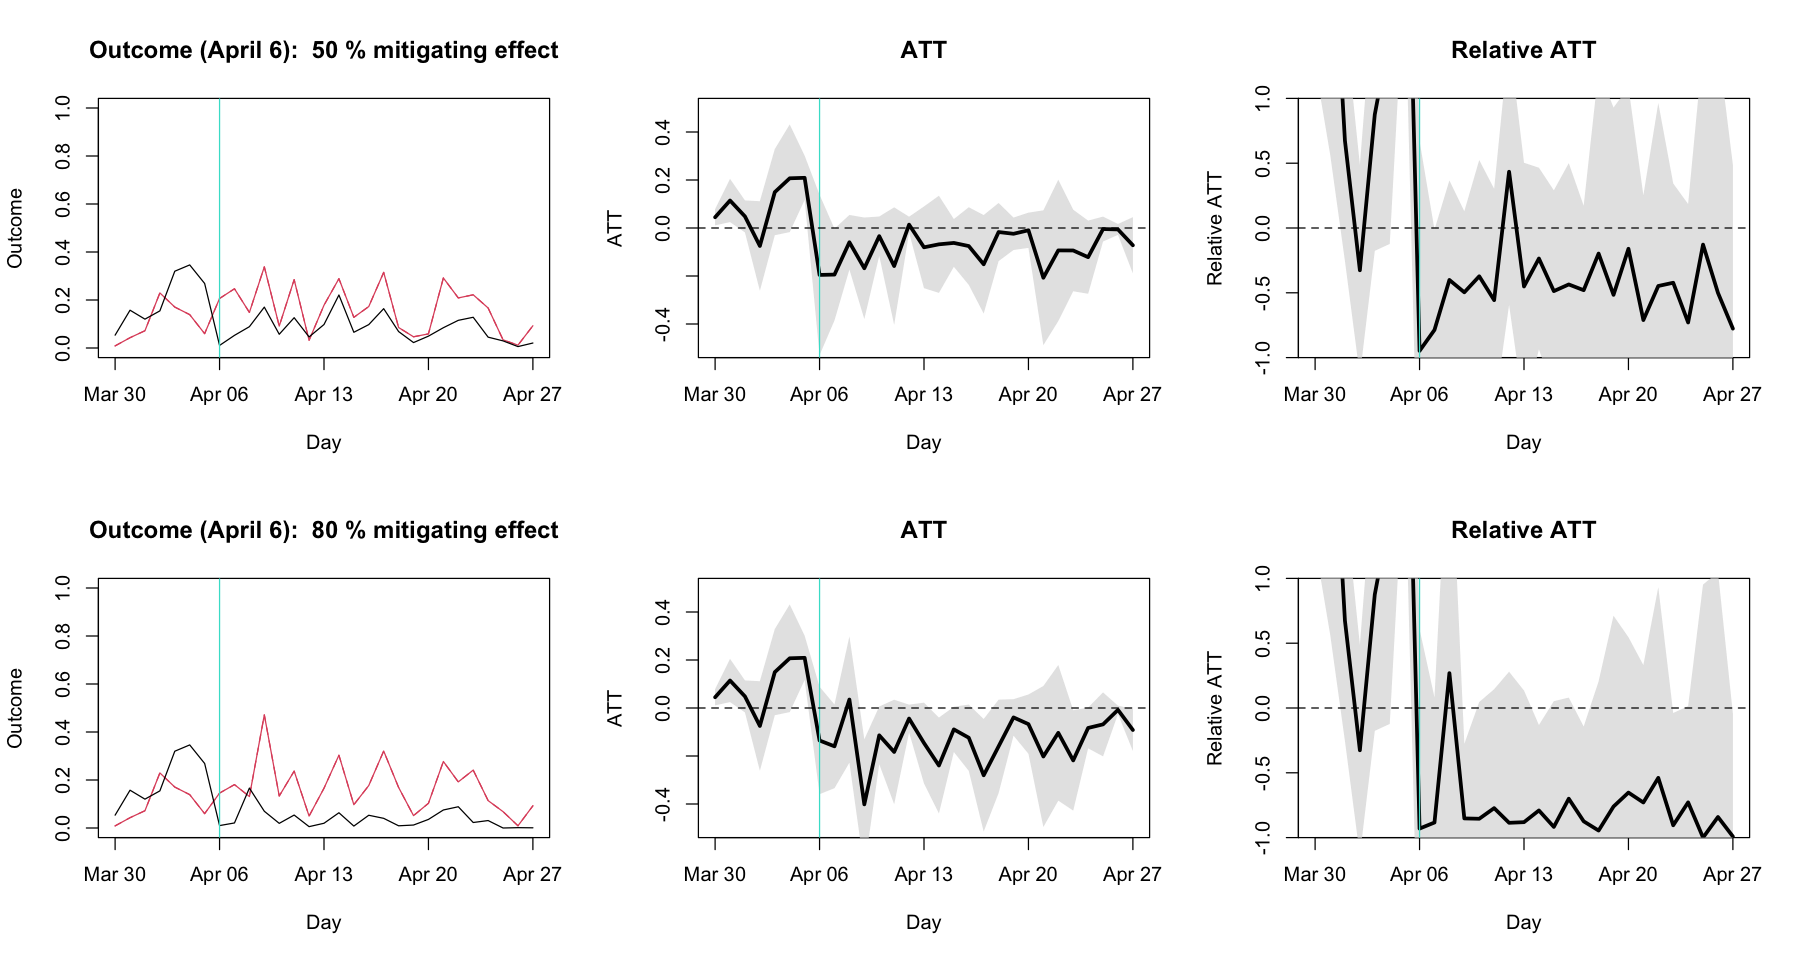

In [4]:
## ATT on April 6
options(repr.plot.width=15,repr.plot.height=8)
set.seed(2021)
par(mfrow=c(2,3),cex=1)

# 50% reduction
nullfrom=8
shadecolor="gray90"
reduction=0.5
source("src/att_beta.R",chdir=T)
figlabels=c("5_a_beta","5_b_beta")
relATplot(figlabels, "ATT",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

# 80% reduction
reduction=0.8
source("src/att_beta.R",chdir=T)
figlabels=c("5_a_beta","5_b_beta")
relATplot(figlabels, "ATT",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

Figure 2. Simulated ATT with assumed 50%/80% causal mitigating effect. Left panels: the average outcome (incidence per capita) of the matched treatment (black) and control (red) groups. Middle panels: absolute ATT and 95% confidence intervals. Right panels: relative ATT and 95% confidence intervals.

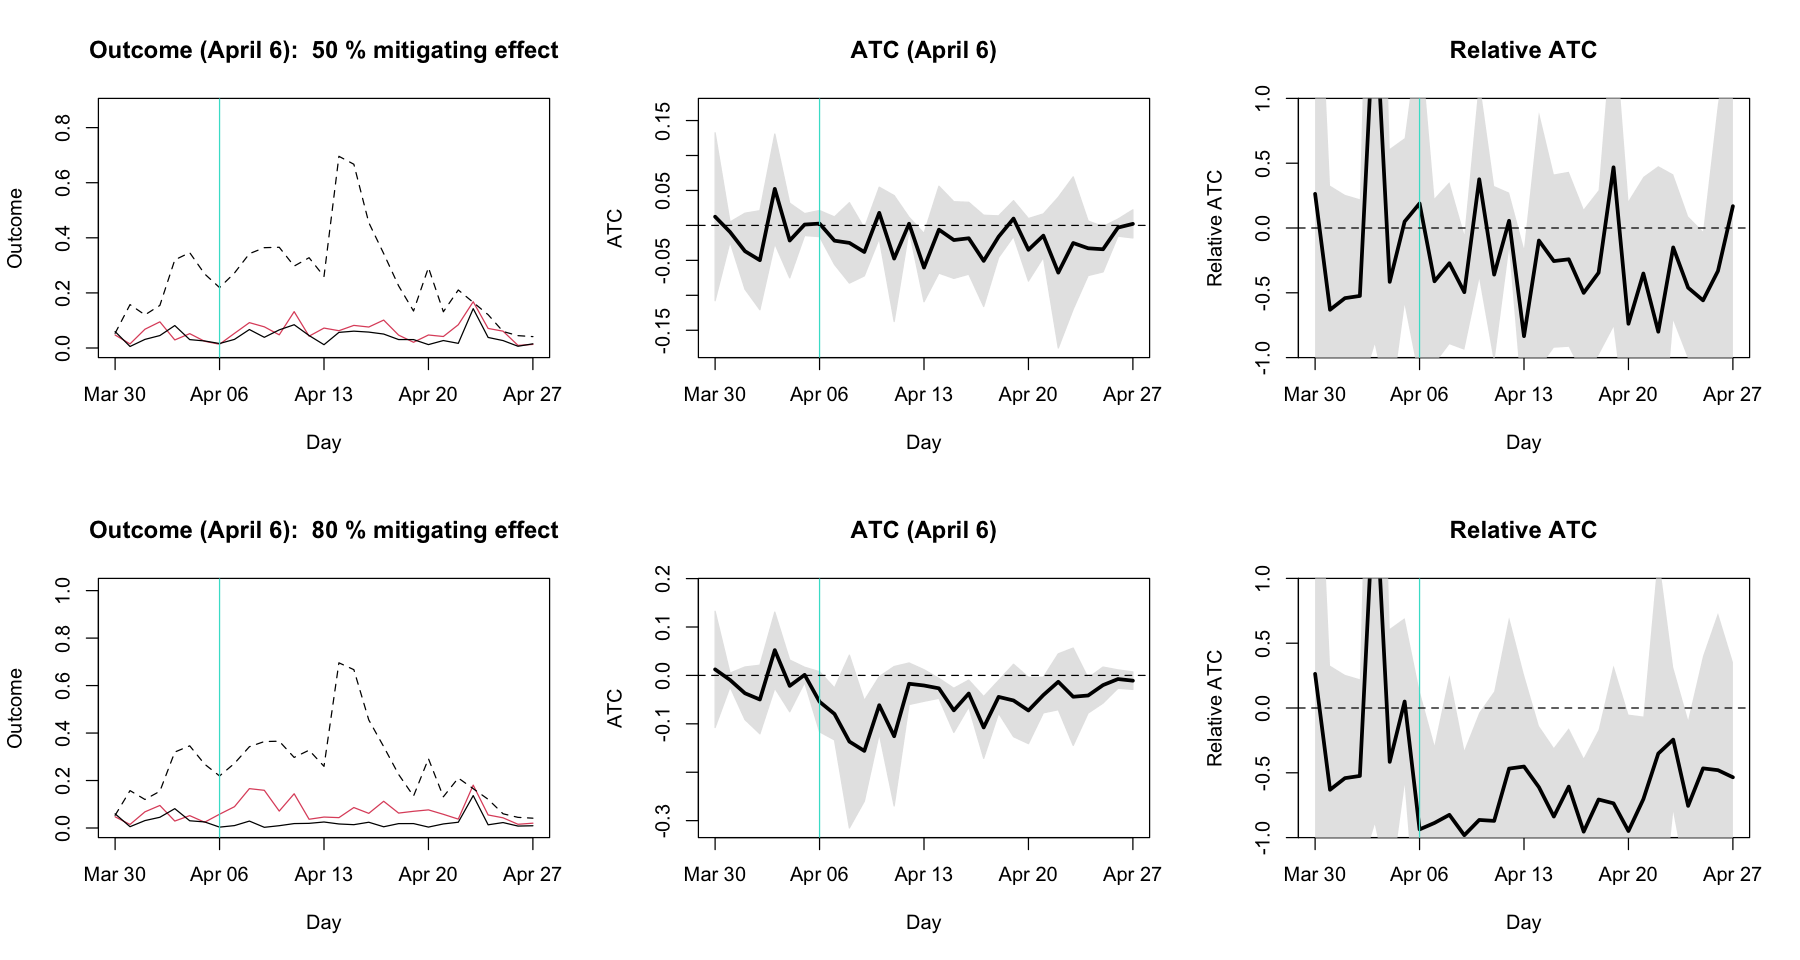

In [5]:
## ATC on April 6
options(repr.plot.width=15,repr.plot.height=8)
set.seed(11)
par(mfrow=c(2,3),cex=1)
nullfrom=8
shadecolor="gray90"
reduction=0.5
source("src/atc_beta.R",chdir=T)
figlabels=c("1_e_beta","1_f_beta")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)
reduction=0.8
source("src/atc_beta.R",chdir=T)
figlabels=c("1_e_beta","1_f_beta")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

Figure 3. Simulated ATT with assumed 50%/80% causal mitigating effect. Left panels: the average outcome (incidence per capita) of the crude treatment (dashed), the matched treatment (black) and control (red) groups. Middle panels: absolute ATT and 95% confidence intervals. Right panels: relative ATT and 95% confidence intervals.

## Supplementary analysis: overfitting in inverse probability weighting (Extended Fig. 4 of the original study)
We also report that one of the subanalyses that authors included, inverse-probability weighting using propensity scores, warratns caution. By computing the ESS, we found that the most samples were essentially lost (Table S1) due to the substantial imbalance in the assigned weights (Figure S2). Of note, for April 10, all samples in the treatment groups received zero weights (handled as 1e-6 by the {WeightIt} R package) because propensity scores in the treatment and control groups are completely separated and thus no sample in the treatment group were comparable to the control group (Figure S2 bottom panel).

This likely happened due to overfitting of the regression model for propensity score assignment. Over 70 variables were included in the model and as a result, a number of regression coefficients had extremely large values (Table S2). Of note, the majority of those coefficients were for prefecture indicator variables (labelled as V1–25), which adds around 50 to 350 to the linear predictor of municipalities in the corresponding prefecture. To address this issue, the degree of model complexity needs to be controlled by, for example, regularisation.

In [6]:
wout0406 <- readRDS("Fukumoto2021/ipw/results/w.out_0406.RDS")
wout0410 <- readRDS("Fukumoto2021/ipw/results/w.out_0410.RDS")
makeesstable<-function(wout){
    rbind(All=c(Control=length(wout$weights[wout$treat!=1]),Treated=length(wout$weights[treat==1])),
          ESS=c(Control=WeightIt::ESS(wout$weights[wout$treat!=1]%>%round(.,5)),Treated=WeightIt::ESS(wout$weights[wout$treat==1]%>%round(.,5))),
         maxweight=c(Control=max(wout$weights[wout$treat!=1]%>%round(.,5)),Treated=max(wout$weights[wout$treat==1]%>%round(.,5))))%>%round(.,1)
}
lapply(list(ATCApr6=wout0406,ATCApr10=wout0410),makeesstable)

,Control,Treated
All,483,256.0
ESS,483,9.4
maxweight,1,41.1
,Control,Treated
All,307,267
ESS,307,NaN
maxweight,1,0


Table 2. The effective sample size and the maximum weight of inverse probability weighted samples

In [7]:
source("src/ipw_obj.R",chdir=T)
source("src/displayfunctions.R",chdir=T)

Warning message:
“Some extreme weights were generated. Examine them with summary() and maybe trim them with trim().”


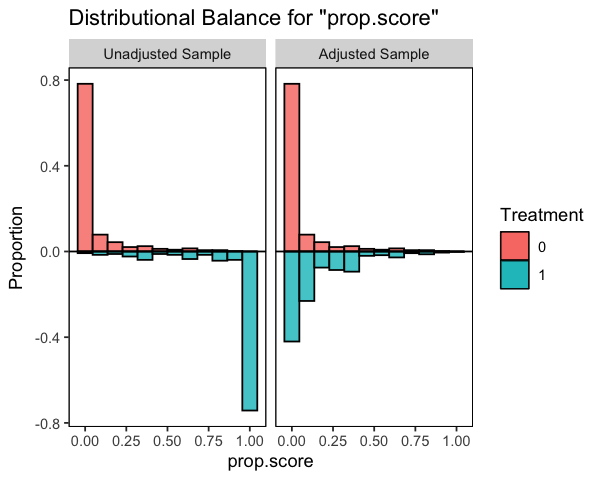

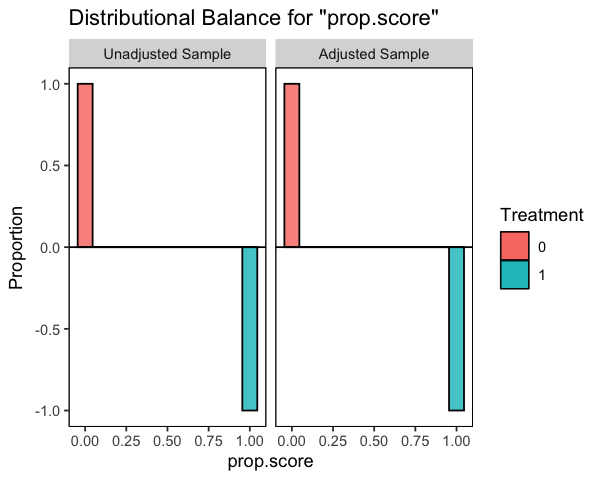

In [8]:
options(repr.plot.width=5,repr.plot.height=4)
balplot(wout0406)
balplot(wout0410)

Figure 4. The distribution of propensity scores before and after inverse probability matching

In [9]:
list(ATCApril6=coefmat(W.out0406),ATCApril10=coefmat(W.out0410))

,coefficient,standardized.coefficient,covariate.min,covariate.max
prec_mean,0.2590708,129.452115,1004.075000,4201.26299
shine_mean,2.2027064,412.101321,1328.095442,2173.55625
tmean_mean,-2.5638202,-6.532979,4.982759,22.31176
V3,-23.4008241,-5.657522,0.000000,1.00000
V9,42.8865502,6.433744,0.000000,1.00000
V10,37.7644922,8.346109,0.000000,1.00000
V11,42.2658360,11.007311,0.000000,1.00000
V13,33.3330646,7.808429,0.000000,1.00000
V19,-42.8476829,-7.600385,0.000000,1.00000
,coefficient,standardized.coefficient,covariate.min,covariate.max


Table 3. Selection of regression coefficients for propensity score assignment suggesting overfitting. Coefficients whose standardised value has over 5 are listed.

## Lasso regression for propensity scores
We incorporated Lasso regularisation to address the issue of overfitting. The hyperparameter (regularisation parameter $\lambda$) was optimised via 10-fold cross validation. Although both the propensity score imbalance and ESS slightly improved, they are still suboptimal for reliable estimation (Figures S3, S4 and Table S3). The estimation results did not show any notable patterns (except for a surge in ATC immediately after the intervention on April 10, which is presumably an artifact).

The fact that the regularised model with the best cross-validation performance still produced highly dichotomised propensity scores may warrant attention. Assuming that the original choice of covariates reflecting the authors' expert knowledge was plausible, the optimal model based on prediction accuracy within this covariate set may reasonably represent the mechanism of treatment assignment. In this case, the positivity assumption required for causal inference may be (nearly) violated, i.e. the treatment assignments for the included municipalities were mostly deterministic, which can compromise the performance of quasi-experimental causal inference via “positivity violation” (Petersen et al. 2020).

Note that the genetic matching in the main analysis of the original study did not use propensity scores and therefore was not affected by the overfitting observed in their IPW analysis. However, this means that the covariates were not weighted by their importance in determining treatment assignment, whereas supplying propensity scores in genetic matching is generally recommended wherever possible (Diamond and Sekhon, 2012). If, for example, the treatment assignment was strongly determined by a small subset of confounders which did not receive large weights in Mahalanobis distance matching (and therefore was not prioritised over other variables in the matching process), the bias arising from these confounders may remain unadjusted for. As a matter of fact, about a half of the pairs of the matched municipalities in the main analysis (for April 6 and 10) had their prefecture dummy variables unmatched for. As some prefecture dummy variables had a large influence on the treatment assignment (Table S3), matching for these variables should ideally be more strictly done. In this light, it would be worth checking the robustness of the main analysis by performing another genetic matching including propensity scores and a calliper (to ensure the matched pairs have sufficiently similar features) and confirming that it yields successful matching with a sufficient ESS.

In [10]:
#suppressWarnings(source("src/ipw_lasso.R",chdir=T))
cvl0406 <- readRDS(paste0("output/ipw_lasso_", "0406",".rds"))
cvl0410 <- readRDS(paste0("output/ipw_lasso_", "0410",".rds"))

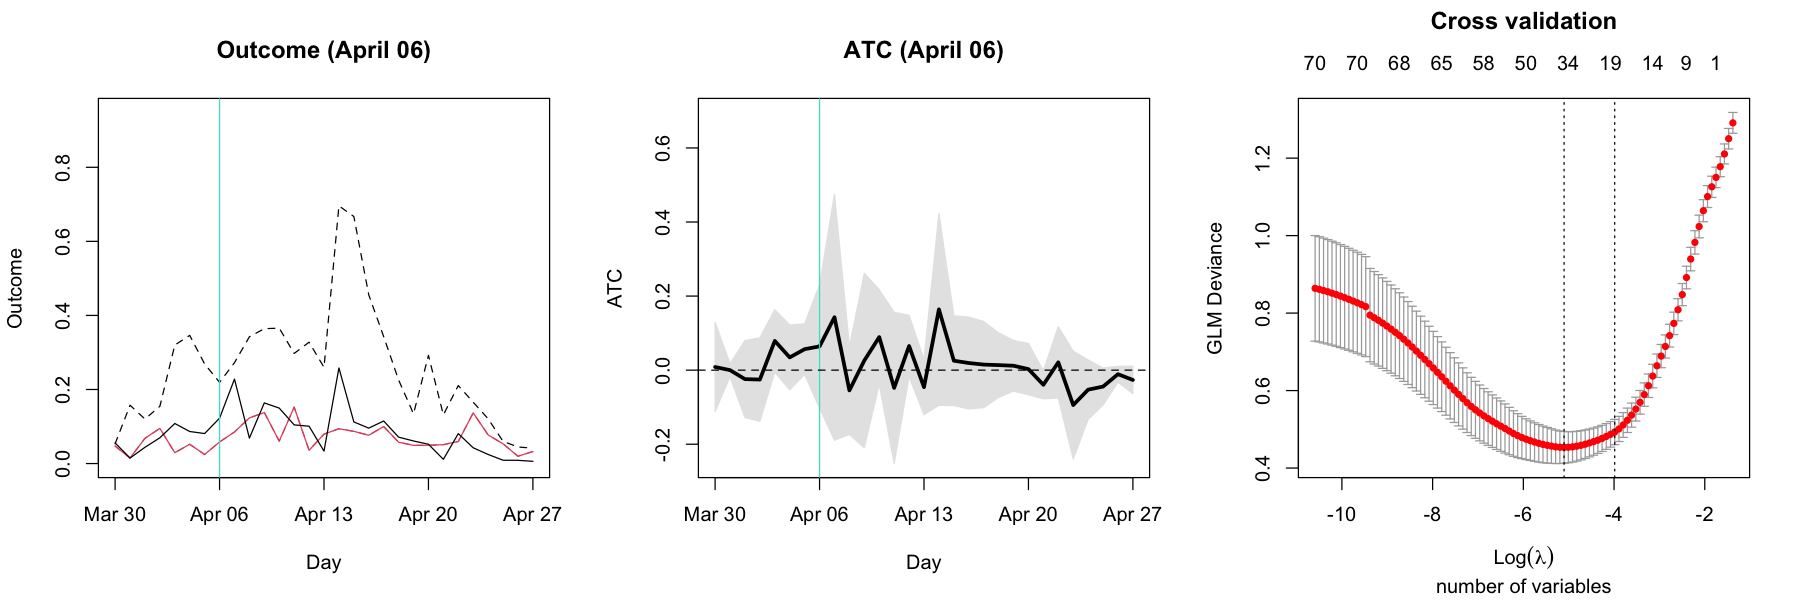

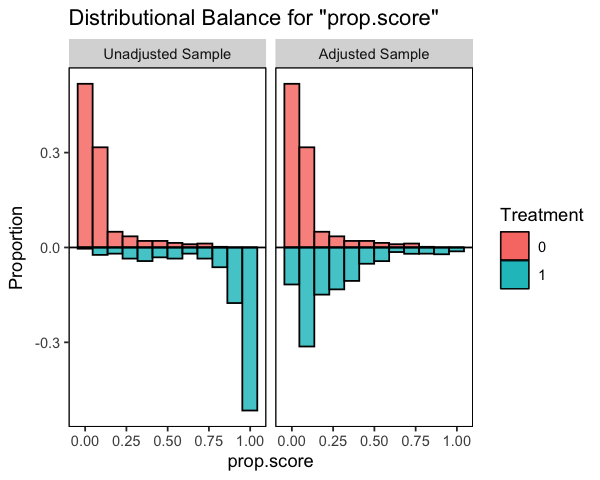

In [11]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,3),cex=1)
plot_ipw_lasso("0406",cvl0406)
options(repr.plot.width=5,repr.plot.height=4)

balplot(cvl0406$wout)

Figure 5-1. ATC estimation with Lasso regression for propensity scores and the propensity score balance (April 6)

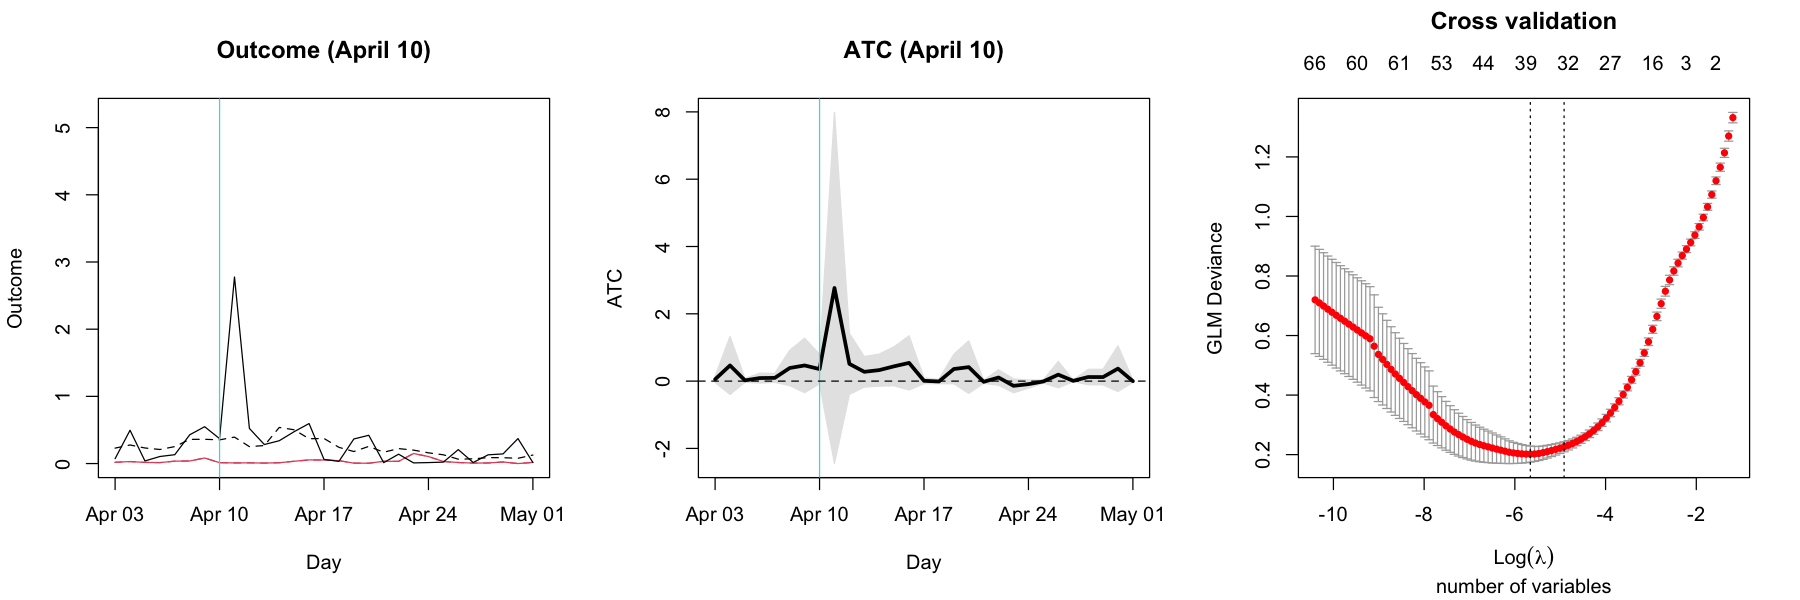

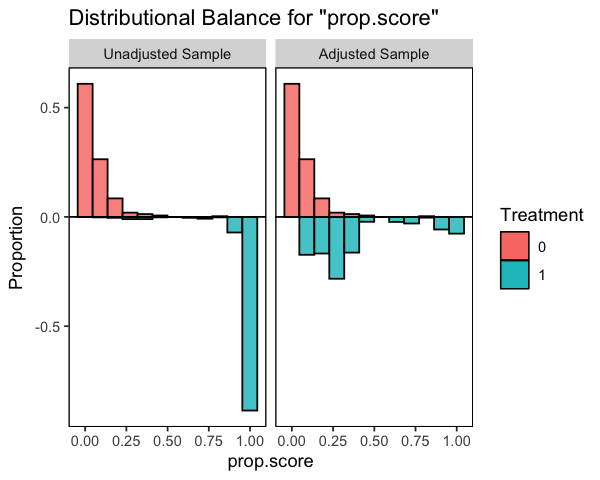

In [12]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,3),cex=1)
plot_ipw_lasso("0410",cvl0410)
options(repr.plot.width=5,repr.plot.height=4)
balplot(cvl0410$wout)

Figure 5-2. ATC estimation with Lasso regression for propensity scores and the propensity score balance (April 10)

In [13]:
lapply(list(ATCApr6_IPW=cvl0406$wout,ATCApr10_IPW=cvl0410$wout),makeesstable)
coefmat(cvl0406,0)
coefmat(cvl0410,0)

,Control,Treated
All,483,491.0
ESS,483,24.0
maxweight,1,21.7
,Control,Treated
All,307,491.0
ESS,307,14.9
maxweight,1,9.3


,coefficient,standardized.coefficient,covariate.min,covariate.max
(Intercept),-7.779484e+00,NA,NA,NA
age.0406,-1.958857e-02,-0.17353284,28.0000000,8.600000e+01
win_count.0406,1.895990e-01,0.21541584,1.0000000,5.000000e+00
shutdown.0316,9.717880e-01,0.18566709,0.0000000,1.000000e+00
prior.infection.per.capita,8.898408e+03,0.27242115,0.0000000,3.154574e-04
cases_1,4.318825e+04,0.23519807,0.0000000,5.047446e-05
cases_2,7.985607e+02,0.01031369,0.0000000,3.154574e-04
cases_3,2.703665e+04,0.20946456,0.0000000,1.414387e-04
cases_4,-1.824166e+04,-0.15177423,0.0000000,1.586043e-04
A1801,1.867038e-01,0.06285733,0.0000000,1.000000e+00


,coefficient,standardized.coefficient,covariate.min,covariate.max
(Intercept),-1.851297e+01,NA,NA,NA
tmean_mean,-7.111738e-02,-0.178983659,4.98275862,2.231176e+01
win_count.0410,-8.892253e-02,-0.103177749,1.00000000,6.000000e+00
log.number,1.099026e-02,0.005498992,0.00000000,2.833213e+00
shutdown.0406,5.948583e+00,2.899456311,0.00000000,1.000000e+00
prior.infection.per.capita,7.137853e+03,0.336572096,0.00000000,4.839100e-04
cases_1,1.462895e+04,0.161097343,0.00000000,1.816530e-04
cases_2,2.695316e+04,0.345998485,0.00000000,2.337978e-04
cases_3,6.372135e+04,0.431068650,0.00000000,9.351912e-05
cases_4,6.678506e+03,0.052951371,0.00000000,1.431229e-04


Table S3. Effective sample size and selected variables in Lasso regression

In [14]:
# number of matched pairs that have unmatched prefecture dummy variables
source("src/unmatchedvars.R",chdir=T)

April 6: 236 matched pairs out of 483 had their prefecture dummy variables unmatched for.
April 10: 166 matched pairs out of 307 had their prefecture dummy variables unmatched for.

## Reanalysis with a calliper and propensity scores
We reanalysed the original dataset with the genetic matching algorithm incorporating propensity scores and a calliper and estimated ATCs for school closures as of Aril 6 and 10, 2020. Propensity scores were estimated by a Lasso-regularised linear regression model and included in genetic matching with a calliper of 0.2 (Austin, 2011). The results remained statistically insignificant and the confidence intervals for the relative effects covered most region from -100% to 100%, although the direction of the weak trend reversed for closure as of April 6 from the original study (Figure 3). ESS of the matched treatment group was only 7 and 3.8 for April 6 and 10, respectively, indicating that the results relied on only a small set of samples that were repeatedly used in matching. Genetic matching is generalisation of propensity score and Mahalanobis distance matching that searches for optimal covariate balance and thus should achieve no worse balance than matching using only Mahalanobis distance (Diamond and Sekhon, 2013). The substantial loss of ESS in the updated genetic matching with propensity scores suggests that improved matching required more samples to be discarded and that both the original and current results are likely unreliable.

In [15]:
## rematch
pop.size <- 1000
nboots <- 1000
set.seed(6042020)
#source("src/re_do.0406.R",chdir=T) # takes ~2 days
#source("src/re_do.0410.R",chdir=T) # takes ~2 days

April 6: 293 matched pairs out of 483 had their prefecture dummy variables unmatched for.


,Control,Treated
All (ESS),483,256.0
All,483,256.0
Matched (ESS),483,5.7
Matched,483,43.0
Unmatched,0,213.0
Discarded,0,0.0


April 10: 149 matched pairs out of 246 had their prefecture dummy variables unmatched for.


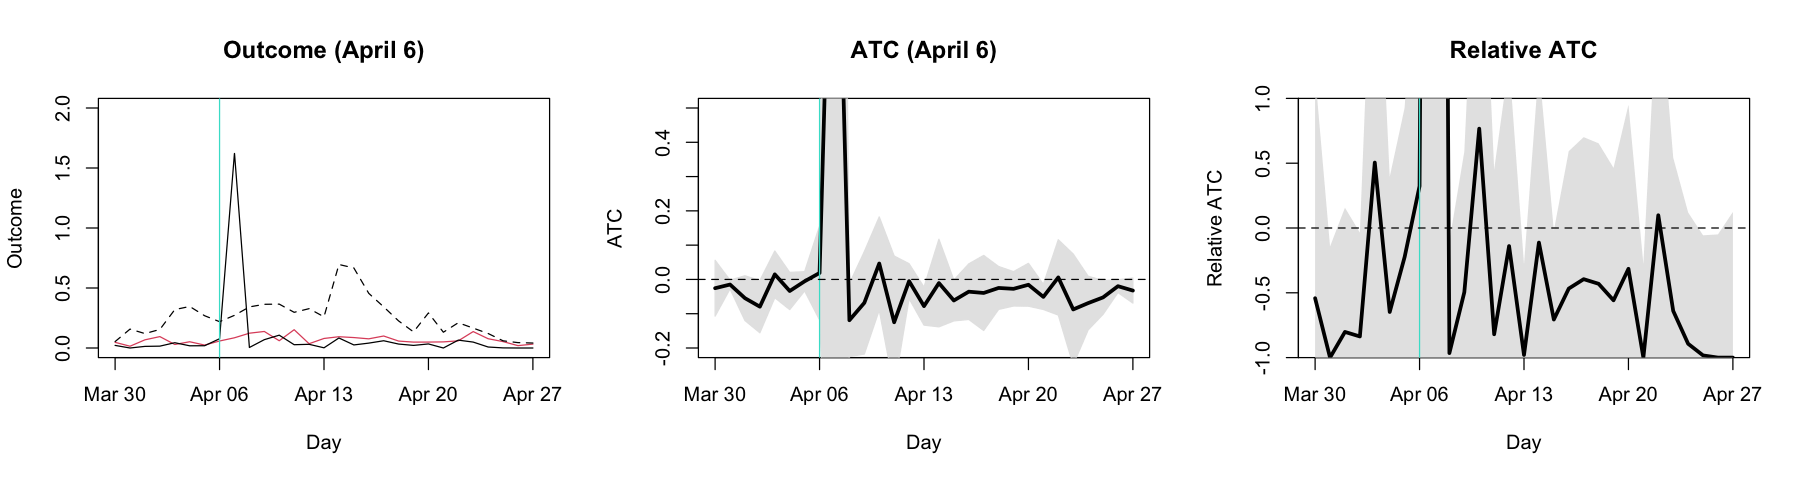

,Control,Treated
All (ESS),307,491.0
All,307,491.0
Matched (ESS),246,3.5
Matched,246,15.0
Unmatched,61,476.0
Discarded,0,0.0


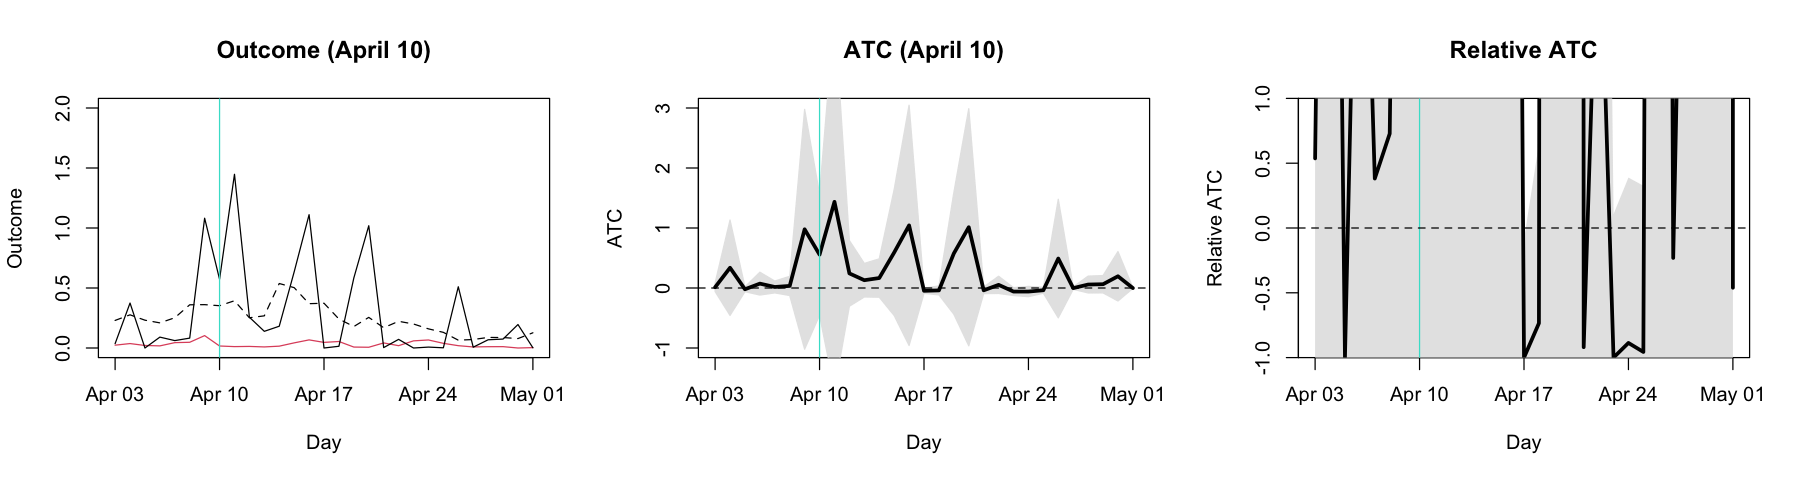

In [16]:
## ATT on April 6
options(repr.plot.width=15,repr.plot.height=4)
par(mfrow=c(1,3),cex=1)

source("src/rematching0406.R",chdir=T)
figlabels=c("1_e_rematch","1_f_rematch")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)
m.out$nn%>%round(.,1)
source("src/rematching0410.R",chdir=T)
figlabels=c("1_g_rematch","1_h_rematch")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)
m.out$nn%>%round(.,1)

Figure 6. Re-estimated ATC using a genetic matching with propensity scores and a calliper of 0.25. Left panel: the average outcome (incidence per capita) of the all unmatched treatment (dashed black), matched treatment (solid black) and control (red) groups. Middle panel: absolute ATC and 95% confidence intervals. Right panels: relative ATC and 95% confidence intervals.

## Conclusion
Our reanalysis of Fukumoto et al. suggested that the study was underpowered to identify the presence of causal mitigating effect of school closure on COVID-19 incidence. While we recognise the importance of the authors' attempt to assessing the school closure policy given its collateral effect imposed onto students and their family, we argue that their conclusion of "no causal effect" was not strongly supported by data due to the limited statistical power. The ESS of matched arms were around 40–50 for the main analysis, which was likely insufficient to find a difference between COVID-19 incidence rates with a substantial variation. The observed separation in propensity scores, which remained even after suppression of overfitting, suggested that there may have been little randomness in the treatment assignment (i.e. whether a municipality is assigned to the treatment or control groups were almost completely predictable from its covariates), limiting the possibility of quasi-experimental analysis within the available data. Finding no mitigating effect of school closure is not surprising in itself because children were not the major drivers of the outbreak especially in the earliest period (Davis et al. 2020); nonetheless, an empirical evidence claiming "no effect" would need to at least show the effect is below the level of practical significance to appear convincing.

Altogether, these limitations represent difficulties in post-hoc causal analysis of mass interventions. As the school closure policy in Japan was recommended universally, the number of municipalities was unbalanced between the treatment and control groups for most of the study period. For the rest of the study period when the assignment was balanced, each municipality likely opted for closing or not closing schools based on their situation including COVID-19 incidence, demographic factors, etc., introducing confounding that might not have been fully addressed with the available sample size. Policy assessments are often infeasible in retrospect, especially when they are implemented without a built-in evaluation plan. The fact that even reasonably designed study by Fukumoto et al. did not achieve a sufficient statistical power to assess the intervention emphasises the importance of the "evidence-generating" philosophy in policy planning, as has also been promoted for medical practices (Embi et al., 213).

## Acknowledgement
This repository contains the replication codes from the original study (Fukumoto et al. 2021) which are partially modified and reused. AE is financially supported by the Japan Society for the Promotion of Science. 

## References
* Fukumoto, K., McClean, C.T., Nakagawa, K. No causal effect of school closures in Japan on the spread of COVID-19 in spring 2020. Nat Med. 2021. https://doi.org/10.1038/s41591-021-01571-8
* Viner, R.M., Russell, S.J., Croker H., et al. School closure and management practices during coronavirus outbreaks including COVID-19: a rapid systematic review. Lancet Child Adolesc Health. 2020;4(5):397-404. https://doi.org/10.1016/S2352-4642(20)30095-X
* Heinze, G. and Schemper, M. A solution to the problem of separation in logistic regression. Statist. Med. 2002;21:2409-2419. https://doi.org/10.1002/sim.1047
* Petersen, M. L., Porter, K. E., Gruber, S., Wang, Y., & van der Laan, M. J. Diagnosing and responding to violations in the positivity assumption. Stat Methods Med Res. 2020;21(1):31–54. https://doi.org/10.1177/0962280210386207
* Diamond, A., Sekhon, J.S.; Genetic Matching for Estimating Causal Effects: A General Multivariate Matching Method for Achieving Balance in Observational Studies. Rev Econ Stat. (2013). 95(3):932–945. https://doi.org/10.1162/REST_a_00318
7. Austin P.C. Optimal caliper widths for propensity-score matching when estimating differences in means and differences in proportions in observational studies. Pharm Stat. 2011;10(2):150-61. https://doi.org/10.1002/pst.433
* Davies, N.G., Klepac, P., Liu, Y. et al. Age-dependent effects in the transmission and control of COVID-19 epidemics. Nat Med (2020). 26:1205–1211 (2020). https://doi.org/10.1038/s41591-020-0962-9
* Embi, P.J., Payne, P.R.O. Evidence Generating Medicine, Med Care 2013. 51(8 Suppl 3):S87-91. https://doi.org/10.1097/MLR.0b013e31829b1d66.51
* Fukumoto, K., McClean, C.T., Nakagawa, K. Replication data for: no causal effect of school closures in Japan on the spread of COVID-19 in spring 2020. Harvard Dataverse https://doi.org/10.7910/DVN/N803UQ (Accessed 8 November 2021)